In [1]:
#importing all imp libs
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
#read excel
df = pd.read_excel('movies.xlsx')

In [3]:
#view top few rows and cols
df.head()

budget                                 company country        director  \
0   8000000           Columbia Pictures Corporation     USA      Rob Reiner   
1   6000000                      Paramount Pictures     USA     John Hughes   
2  15000000                      Paramount Pictures     USA      Tony Scott   
3  18500000  Twentieth Century Fox Film Corporation     USA   James Cameron   
4   9000000                    Walt Disney Pictures     USA  Randal Kleiser   

       genre      gross                      name rating             released  \
0  Adventure   52287414               Stand by Me      R  1986-08-22 00:00:00   
1     Comedy   70136369  Ferris Bueller's Day Off  PG-13  1986-06-11 00:00:00   
2     Action  179800601                   Top Gun     PG  1986-05-16 00:00:00   
3     Action   85160248                    Aliens      R  1986-07-18 00:00:00   
4  Adventure   18564613   Flight of the Navigator     PG  1986-08-01 00:00:00   

   runtime  score               star   votes         writer  year  
0       89    8.1        Wil Wheaton  299174   Stephen King  1986  
1      103    7.8  Matthew Broderick  264740    John Hughes  1986  
2      110    6.9         Tom Cruise  236909       Jim Cash  1986  
3      137    8.4   Sigourney Weaver  540152  James Cameron  1986  
4       90    6.9        Joey Cramer   36636  Mark H. Baker  1986

In [4]:
#info about cols and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null int64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null int64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(1), int64(5), object(9)
memory usage: 799.3+ KB


In [5]:
#what % null in a col
for nullcol in df.columns:
    val_missing = np.mean(df[nullcol].isnull())
    print('{} - {}%'.format(nullcol, val_missing * 100))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [6]:
df

budget                                  company    country  \
0      8000000            Columbia Pictures Corporation        USA   
1      6000000                       Paramount Pictures        USA   
2     15000000                       Paramount Pictures        USA   
3     18500000   Twentieth Century Fox Film Corporation        USA   
4      9000000                     Walt Disney Pictures        USA   
5      6000000                                  Hemdale         UK   
6     25000000                   Henson Associates (HA)         UK   
7      6000000  De Laurentiis Entertainment Group (DEG)        USA   
8      9000000                       Paramount Pictures        USA   
9     15000000                     SLM Production Group        USA   
10     8800000                            Rimfire Films  Australia   
11    16000000           Thorn EMI Screen Entertainment         UK   
12     6000000   Twentieth Century Fox Film Corporation        USA   
13    25000000   Twentieth Century Fox Film Corporation        USA   
14    15000000  De Laurentiis Entertainment Group (DEG)        USA   
15    17000000       Producers Sales Organization (PSO)        USA   
16    10000000  De Laurentiis Entertainment Group (DEG)        USA   
17    25000000                      Geffen Company, The        USA   
18     2700000    New Century Entertainment Corporation        USA   
19    35000000                       Universal Pictures        USA   
20     2000000                          New Line Cinema        USA   
21    11000000                           Orion Pictures        USA   
22     4700000                             Cannon Films        USA   
23    15000000                   Jay Weston Productions        USA   
24    25000000                       Paramount Pictures        USA   
25           0                         TriStar Pictures        USA   
26           0                     Neue Constantin Film      Italy   
27           0                         TriStar Pictures        USA   
28    25000000                       Paramount Pictures        USA   
29     1900000                                  Hemdale        USA   
...        ...                                      ...        ...   
6790  26000000                     Broad Green Pictures        USA   
6791         0                                 AZ Films      Chile   
6792    130000                Changing Film Productions        USA   
6793   8000000                            Cinelou Films        USA   
6794    900000                 Hidden Empire Film Group        USA   
6795         0                RabbitBandini Productions        USA   
6796  15000000                           Demarest Films        USA   
6797  10000000                                BBC Films         UK   
6798  20000000                              StudioCanal         UK   
6799  18000000                        Gold Circle Films        USA   
6800  17000000         Perfect World Pictures (Beijing)        USA   
6801         0                                       42         UK   
6802         0                           Mandarin Films     France   
6803   5000000                                IM Global        USA   
6804         0                           Digic Pictures      Japan   
6805         0                          Parts and Labor        USA   
6806         0              Bing Feng Bao Entertainment        USA   
6807   4000000                    Blumhouse Productions        USA   
6808   3000000                           Westerly Films    Ireland   
6809   3800000                        Sycamore Pictures        USA   
6810         0                              StudioCanal         UK   
6811   8500000                                CBS Films        USA   
6812         0                             Killer Films        USA   
6813         0                  Anna Biller Productions        USA   
6814  20000000                         LD Entertainment        USA   
6815         0    

In [7]:
#released col year != some year col enteries hence to fix that 
df['year_released'] = df['released'].astype(str).str[:4]

In [8]:
#converting realeased year to int for later correlation cal
df['year_released'] = df['year_released'].apply(pd.to_numeric)
print(df.dtypes)

budget             int64
company           object
country           object
director          object
genre             object
gross              int64
name              object
rating            object
released          object
runtime            int64
score            float64
star              object
votes              int64
writer            object
year               int64
year_released      int64
dtype: object


In [9]:
#sorting data from hightest grossing to lowest grossing movies
pd.set_option('display.max_rows', None) #displays whole dataset
df = df.sort_values('gross',ascending=False)

In [10]:
df.head()

budget                                 company country  \
6380  245000000                               Lucasfilm     USA   
5061  237000000  Twentieth Century Fox Film Corporation      UK   
2420  200000000  Twentieth Century Fox Film Corporation     USA   
6391  150000000                      Universal Pictures     USA   
5723  220000000                          Marvel Studios     USA   

             director   genre      gross                          name rating  \
6380      J.J. Abrams  Action  936662225  Star Wars: The Force Awakens  PG-13   
5061    James Cameron  Action  760507625                        Avatar  PG-13   
2420    James Cameron   Drama  658672302                       Titanic  PG-13   
6391  Colin Trevorrow  Action  652270625                Jurassic World  PG-13   
5723      Joss Whedon  Action  623357910                  The Avengers  PG-13   

                 released  runtime  score               star    votes  \
6380  2015-12-18 00:00:00      136    8.1       Daisy Ridley   687192   
5061  2009-12-18 00:00:00      162    7.8    Sam Worthington   954412   
2420  1997-12-19 00:00:00      194    7.8  Leonardo DiCaprio   862554   
6391  2015-06-12 00:00:00      124    7.0        Chris Pratt   469200   
5723  2012-05-04 00:00:00      143    8.1  Robert Downey Jr.  1064633   

               writer  year  year_released  
6380  Lawrence Kasdan  2015           2015  
5061    James Cameron  2009           2009  
2420    James Cameron  1997           1997  
6391       Rick Jaffa  2015           2015  
5723      Joss Whedon  2012           2012

In [11]:
#to drop duplicates if any
df.drop_duplicates()

budget                                            company  \
6380  245000000                                          Lucasfilm   
5061  237000000             Twentieth Century Fox Film Corporation   
2420  200000000             Twentieth Century Fox Film Corporation   
6391  150000000                                 Universal Pictures   
5723  220000000                                     Marvel Studios   
4840  185000000                                       Warner Bros.   
6614  200000000                                          Lucasfilm   
6687  200000000                            Pixar Animation Studios   
2870  115000000                                          Lucasfilm   
6398  250000000                                     Marvel Studios   
5720  250000000                                       Warner Bros.   
4001  150000000                                         DreamWorks   
5954  130000000                                        Color Force   
4404  225000000                               Walt Disney Pictures   
5309  200000000                               Walt Disney Pictures   
5959  200000000                                     Marvel Studios   
6624  250000000                                     Marvel Studios   
5722   78000000                                          Lionsgate   
3522  139000000                      Columbia Pictures Corporation   
1544   63000000                                 Universal Pictures   
5082  200000000                                         DreamWorks   
5943  150000000                      Walt Disney Animation Studios   
5500  125000000                                       Warner Bros.   
3750   94000000                            Pixar Animation Studios   
4195  113000000                                          Lucasfilm   
3743   94000000                                    New Line Cinema   
3997  200000000                      Columbia Pictures Corporation   
3987   30000000                                   Icon Productions   
6658   75000000                                 Universal Pictures   
5987   76000000                                 Universal Pictures   
6676  175000000                             Fairview Entertainment   
6616   58000000             Twentieth Century Fox Film Corporation   
6402  175000000                            Pixar Animation Studios   
6408  190000000                                 Universal Pictures   
5521  195000000                                 Paramount Pictures   
6184   58800000                                       Warner Bros.   
3530   94000000                                    New Line Cinema   
6630  150000000                               Walt Disney Pictures   
6197  125000000                                        Color Force   
4637  258000000                                  Columbia Pictures   
6442   74000000                         Illumination Entertainment   
5301  200000000                               Walt Disney Pictures   
6162  170000000                                     Marvel Studios   
6619  250000000                                       Warner Bros.   
1762   55000000                                 Paramount Pictures   
6603  175000000                                Atlas Entertainment   
4670  160000000                               DreamWorks Animation   
4620  150000000                                         DreamWorks   
4847  140000000                                 Paramount Pictures   
3300  125000000                                       Warner Bros.   
4870  185000000                                 Paramount Pictures   
3301   93000000                                    New Line Cinema   
1764   45000000                               Walt Disney Pictures   
5297  200000000                                 Paramount Pictures   
3541  115000000                                          Lucasfilm   
4631  300000000                               Walt Disney Pictures   
2205   75000000    

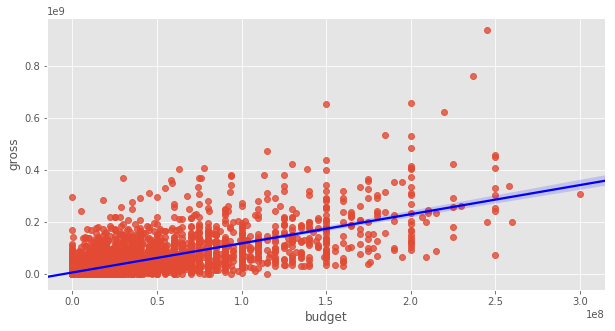

In [12]:
#plot a regression plot to check corr between budget and gross amount
plt.figure(figsize=(10,5))
sns.regplot(x='budget',y='gross',data = df,line_kws={"color":"blue"})

In [13]:
df.corr()

budget     gross   runtime     score     votes      year  \
budget         1.000000  0.712196  0.268226  0.042145  0.503924  0.291009   
gross          0.712196  1.000000  0.224579  0.165693  0.662457  0.191548   
runtime        0.268226  0.224579  1.000000  0.395343  0.317399  0.087639   
score          0.042145  0.165693  0.395343  1.000000  0.393607  0.105276   
votes          0.503924  0.662457  0.317399  0.393607  1.000000  0.229304   
year           0.291009  0.191548  0.087639  0.105276  0.229304  1.000000   
year_released  0.274820  0.176879  0.088342  0.117679  0.220797  0.996229   

               year_released  
budget              0.274820  
gross               0.176879  
runtime             0.088342  
score               0.117679  
votes               0.220797  
year                0.996229  
year_released       1.000000

Text(0.5, 1.0, 'Correlation of all numeric values with each other')

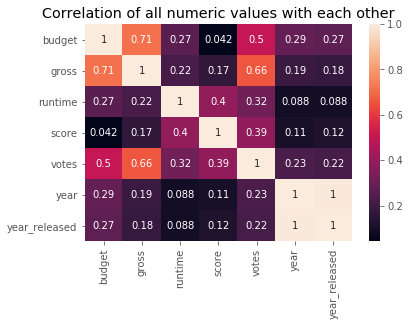

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation of all numeric values with each other')

In [15]:
#to give all non numeric fields a numeric value so that corr can be performed on all
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

budget  company  country  director  genre      gross  name  rating  \
6380  245000000     1428       54      1037      0  936662225  4679       7   
5061  237000000     2062       53      1066      0  760507625   501       7   
2420  200000000     2062       54      1066      6  658672302  6177       7   
6391  150000000     2085       54       466      0  652270625  2721       7   
5723  220000000     1491       54      1412      0  623357910  4995       7   

      released  runtime  score  star    votes  writer  year  year_released  
6380         0      136    8.1   475   687192    2356  2015           2015  
5061         1      162    7.8  2084   954412    1629  2009           2009  
2420         2      194    7.8  1444   862554    1629  1997           1997  
6391         3      124    7.0   404   469200    3310  2015           2015  
5723         4      143    8.1  2001  1064633    2145  2012           2012

Text(0.5, 1.0, 'Correlation of all column values with each other')

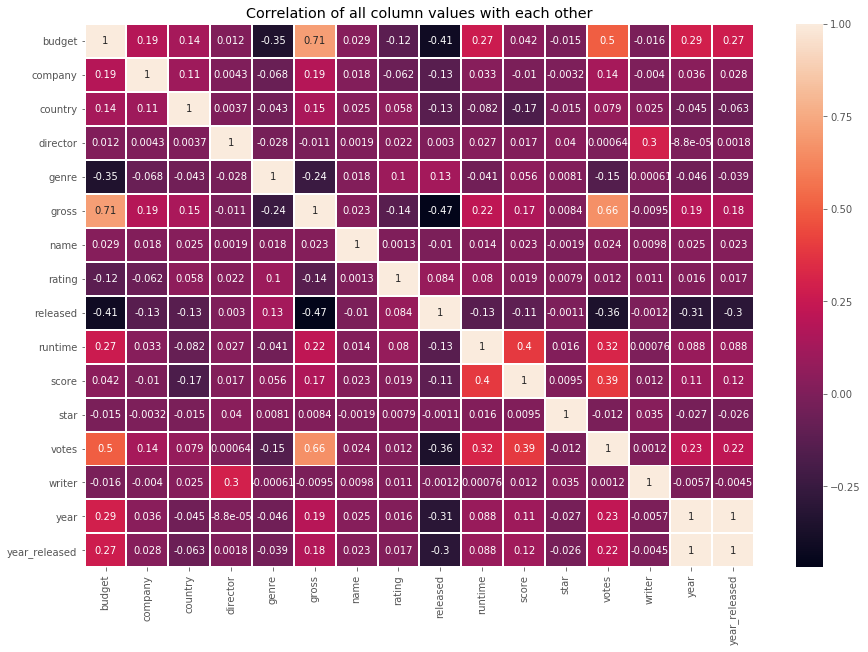

In [16]:
plt.subplots(figsize=(15,10))
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=1,linecolor='white')
plt.title('Correlation of all column values with each other')

# Conclusion:

Budget happened to have a high correlation with Gross profits while Votes showed some promising correlation to Gross profits as well. The rest either had a low or a negative correlation.